# Model Development to Predict The Price of the Car Using the Variables or Features.

Import libraries:


In [2]:
import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy'])
# await piplite.install(['scikit-learn'])
await piplite.install(['skillsnetwork', 'seaborn'])

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [4]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')

Saved as 'automobileEDA.csv'


In [6]:
df = pd.read_csv("automobileEDA.csv", header=0)

<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>


<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help in understanding the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [7]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object:</h4>


In [8]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help in predicting car price?</h4>

Using simple linear regression, A linear function will be created with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [49]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:


In [50]:
lm.fit(X,Y)

LinearRegression()

In [36]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>What is the value of the intercept (a)?</h4>


In [51]:
lm.intercept_

38423.30585815743

<h4>What is the value of the slope (b)?</h4>


In [38]:
lm.coef_

array([-821.73337832])

<h3>What is the final estimated linear model?</h3>

The final linear model should be with the structure:

$$
Yhat = a + b  X
$$


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>



<b>Create a linear regression object called "lm1".</b>

In [39]:
lm1 = LinearRegression()

<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>

In [40]:
X = df[['engine-size']]
Y = df['price']
lm1.fit(X, Y)

LinearRegression()

<b>Find the slope and intercept of the model.</b>

<h4>Slope</h4>


In [41]:
lm1.coef_

array([166.86001569])

<h4>Intercept</h4>


In [42]:
lm1.intercept_

-7963.338906281049

In [43]:
yhat = -7963.34 + 166.86*X
yhat[0:5]

,engine-size
0,13728.46
1,13728.46
2,17399.38
3,10224.40
4,14729.62


<h4>Multiple Linear Regression</h4>


$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


The equation is given by:


$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>From the previous section the good predictors of price are:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [79]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.


In [133]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of the intercept(a)?


In [134]:
lm.intercept_

-15806.62462632922

What are the values of the coefficients (b1, b2, b3, b4)?


In [135]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

What is the final estimated linear model?


The final linear function should be with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".

In [58]:
lm2 = LinearRegression()
Z = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Z, df["price"])
yhat = lm2.predict(Z)
yhat[0:5]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

<b>Find the coefficient of the model.</b>

In [59]:
lm2.coef_

array([   1.49789586, -820.45434016])

<h2>2. Model Evaluation Using Visualization</h2>


In [60]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of the model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0.0, 48168.69062773822)

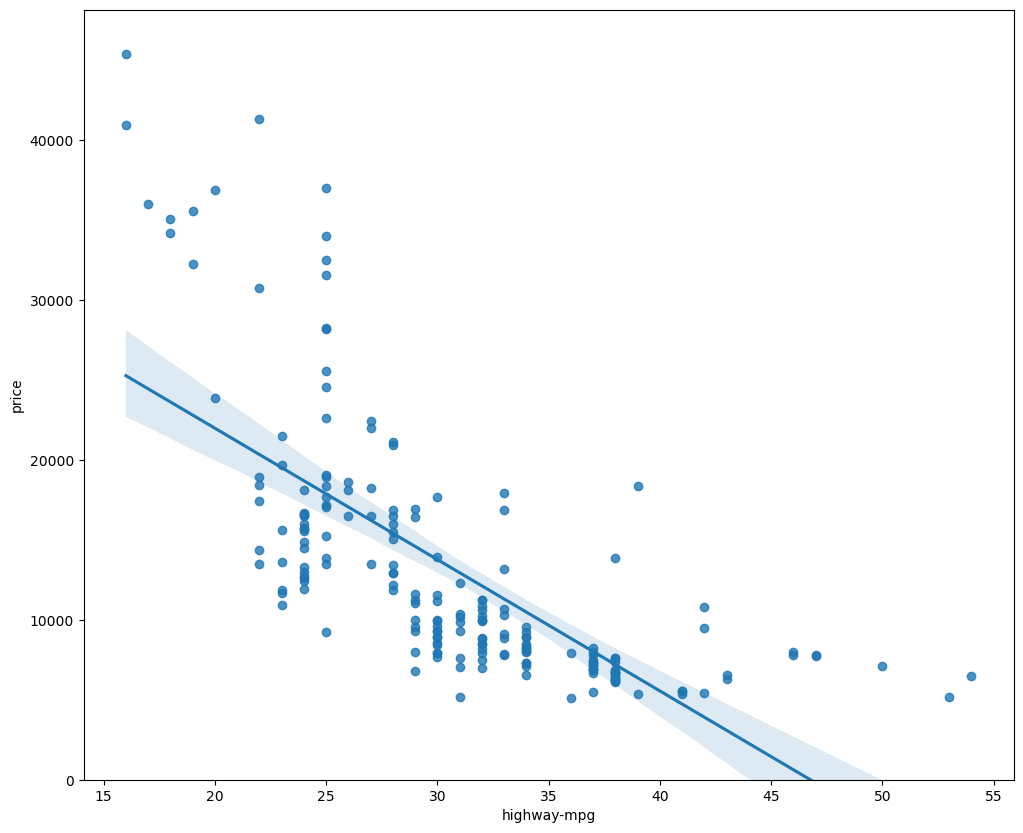

In [136]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

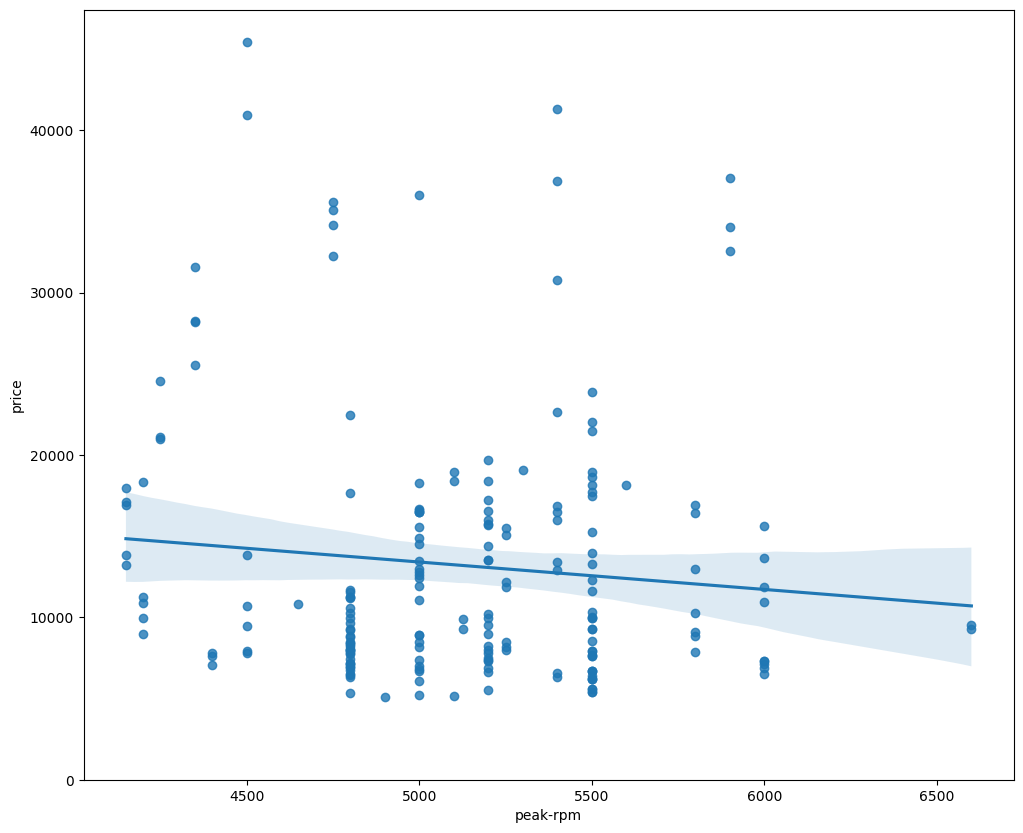

In [137]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", It can be seen that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


In [63]:
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

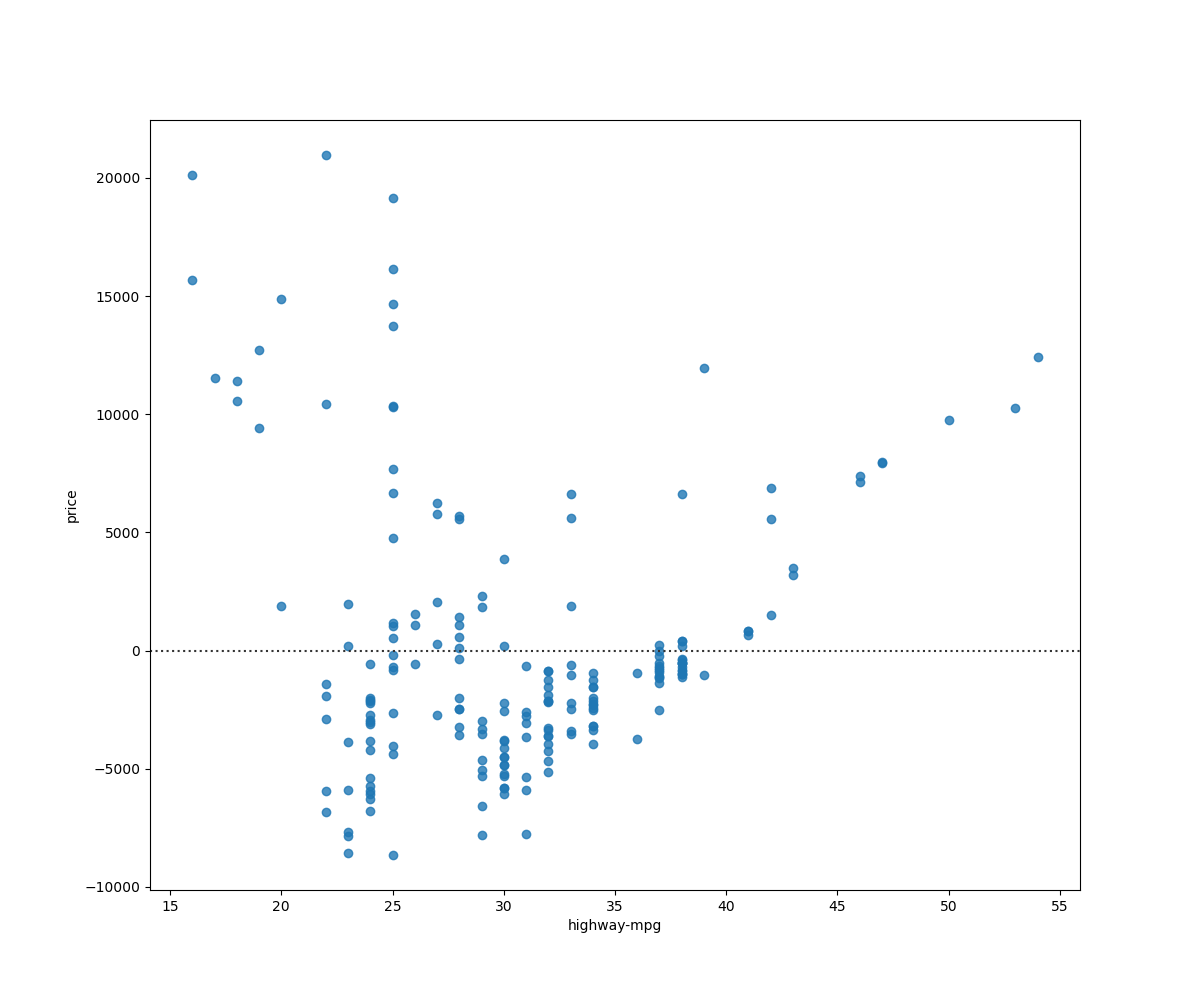

<Figure size 1200x1000 with 0 Axes>

In [138]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<p>It can be seen from this residual plot that the residuals are not randomly spread around the x-axis, leading to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


In [65]:
Y_hat = lm.predict(Z)


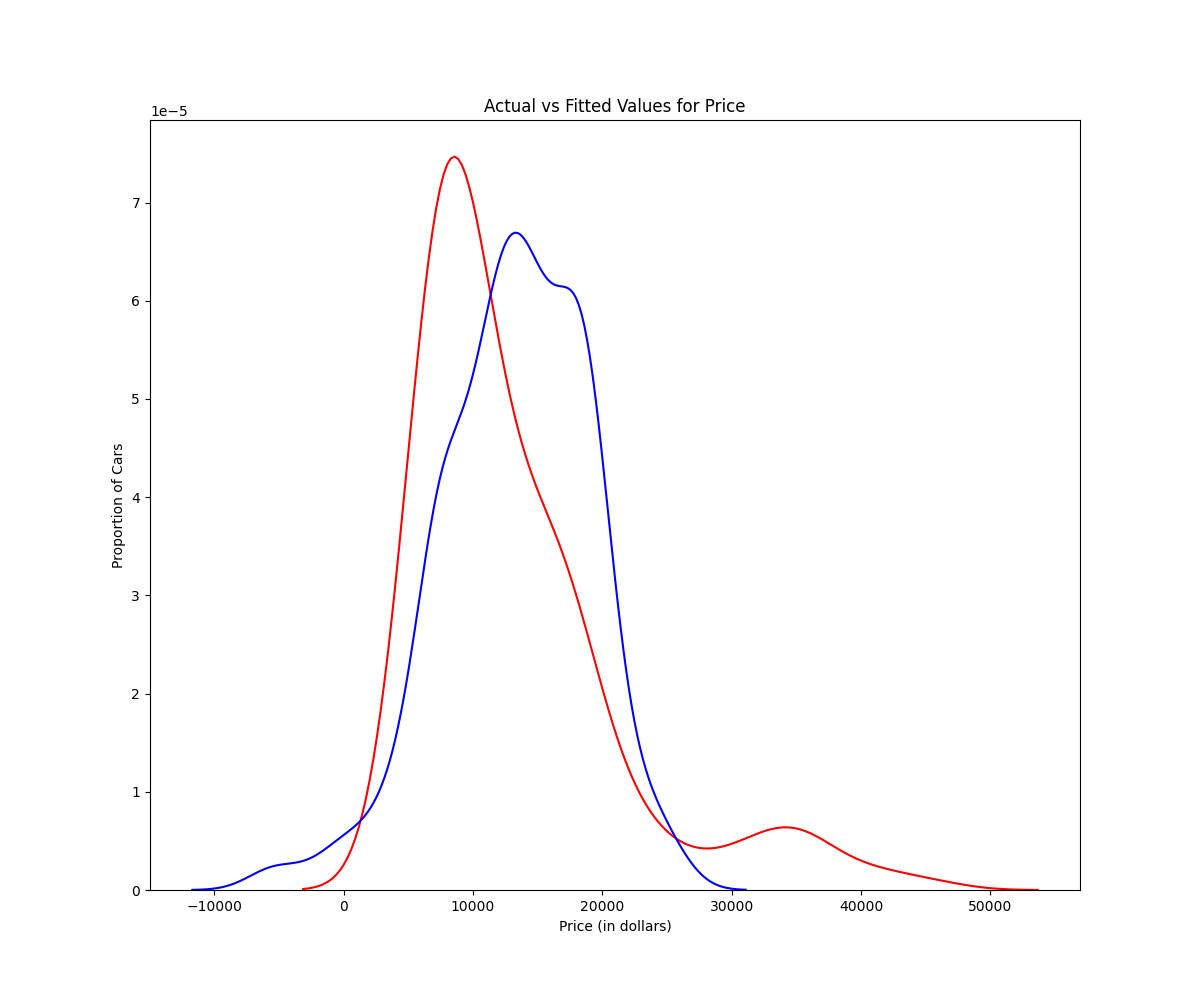

In [66]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>It can seen that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>3. Polynomial Regression and Pipelines</h2>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>Earlier, it was seen that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Here, the fitting of a polynomial model to the data will be carried out.</p>


In [67]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [68]:
x = df['highway-mpg']
y = df['price']

In [69]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


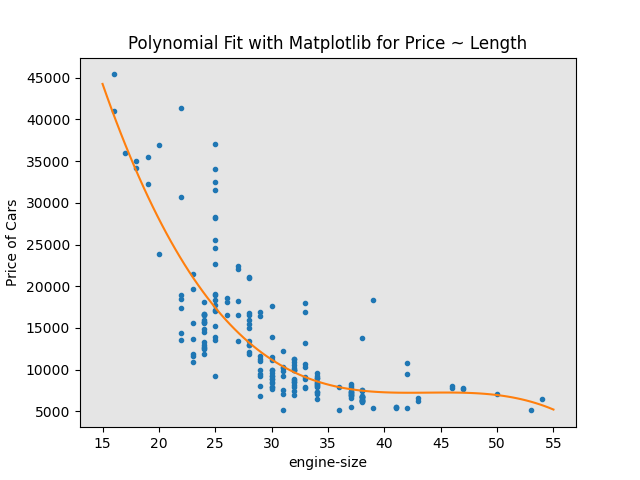

In [70]:
PlotPolly(p, x, y, 'highway-mpg')

In [71]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>It can already be seen from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<b>Create 11 order polynomial model with the variables x and y from above.</b>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


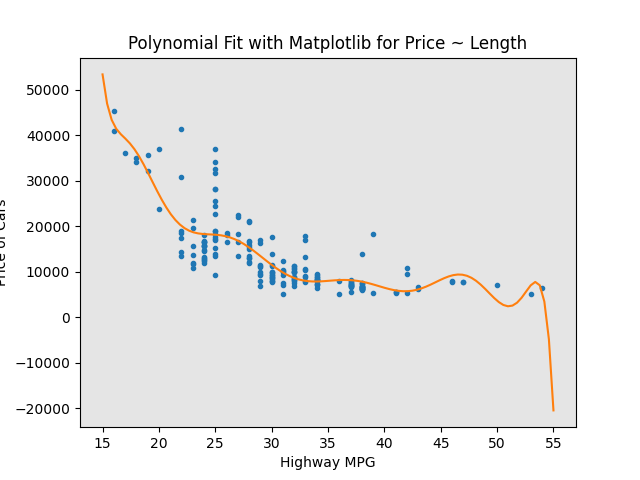

In [73]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, "Highway MPG")

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [82]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.


In [83]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.


In [84]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [87]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [88]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [89]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [90]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>

In [91]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>4. Measures for In-Sample Evaluation</h2>


<p>When evaluating the models, not only do you want to visualize the results, but also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>


calculate the R^2:


In [92]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


calculate the MSE:


In [93]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>


calculate the R^2:


In [96]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


calculate the MSE.


In [97]:
Y_predict_multifit = lm.predict(Z)

compare the predicted results with the actual results:


In [98]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>


calculate the R^2.


In [99]:
from sklearn.metrics import r2_score

In [108]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


<h3>MSE</h3>


calculate the MSE:


In [101]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, the model was trained using the method <b>fit</b>. Now, the method <b>predict</b> will be used to produce a prediction.</p>


In [102]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:


In [103]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model:


In [104]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:


In [105]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

plot the data:


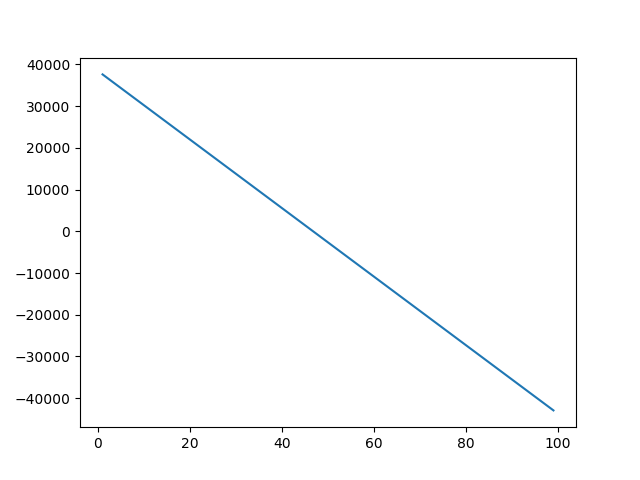

<Figure size 640x480 with 0 Axes>

In [106]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>


<p>
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, it can also be seen that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: It can be seen that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, It can be concluded that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>


<p>Comparing these three models, It can be concluded that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since there were just 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
